In [1]:
pip install biolord

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.0.dev0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_utilities-0.12.0.dev0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/l

In [2]:
pip install lamindb

INFO: pip is looking at multiple versions of s3transfer to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 90.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 97.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Unins

In [2]:
pip install tiledbsoma

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 7.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
import os
import sys
import re
import biolord
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import sklearn
import torch


from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mutual_info_score
)

In [2]:
adata = sc.read("/work/Biolord_all/new_data_raw/healthy_hamstring_processed_adata_raw.h5ad")

In [3]:
adata.obs["suspension_type"]

AAACCCAAGAAGTCCG_HAM_MSK1216    nucleus
AAACCCAAGTTCATCG_HAM_MSK1216    nucleus
AAACGAACACATTCGA_HAM_MSK1216    nucleus
AAACGAACATGGAGAC_HAM_MSK1216    nucleus
AAACGAATCCTCATAT_HAM_MSK1216    nucleus
                                 ...   
TTTGACTAGTGGACTG_HAM_MSK0782    nucleus
TTTGGTTCAGTAGATA_HAM_MSK0782    nucleus
TTTGTTGAGTGCAGCA_HAM_MSK0782    nucleus
TTTGTTGCATGTACGT_HAM_MSK0782    nucleus
TTTGTTGGTCAAGCGA_HAM_MSK0782    nucleus
Name: suspension_type, Length: 10013, dtype: category
Categories (1, object): ['nucleus']

In [3]:
adata

AnnData object with n_obs × n_vars = 10013 × 22692
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'nUMI', 'nGene', 'mitoRatio', 'scDblFinder.score', 'decontX_contamination', 'cell_type', 'assay', 'disease', 'organism', 'sex',

In [4]:
# Split the data set into train and test
from sklearn.model_selection import train_test_split


split_key = "split"
adata.obs[split_key] = "train"
idx = list(range(len(adata)))
idx_train, idx_test = train_test_split(adata.obs_names, test_size=0.1, random_state=42)
adata.obs.loc[idx_train, split_key] = "train"
adata.obs.loc[idx_test, split_key] = "test"

In [5]:
adata_normal = adata.copy()

In [6]:
adata_normal

AnnData object with n_obs × n_vars = 10013 × 22692
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'nUMI', 'nGene', 'mitoRatio', 'scDblFinder.score', 'decontX_contamination', 'cell_type', 'assay', 'disease', 'organism', 'sex',

In [7]:
# Normalizing to median total counts
sc.pp.normalize_total(adata_normal, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata_normal)

In [8]:
# Filter the data to use only the training set and make a copy
adata_train = adata_normal[adata_normal.obs[split_key] == "train"].copy()
adata_test = adata_normal[adata_normal.obs[split_key] == "test"].copy()

In [9]:
biolord.Biolord.setup_anndata(
    adata_normal, ordered_attributes_keys=None, categorical_attributes_keys=["cell_type", "sex", "donor_id"]
)

In [10]:
# Instantiate a Biolord model

module_params = {
    "decoder_width": 1024,
    "decoder_depth": 4,
    "attribute_nn_width": 512,
    "attribute_nn_depth": 2,
    "n_latent_attribute_categorical": 4,
    "gene_likelihood": "normal",
    "reconstruction_penalty": 1e2,
    "unknown_attribute_penalty": 1e1,
    "unknown_attribute_noise_param": 1e-1,
    "attribute_dropout_rate": 0.1,
    "use_batch_norm": False,
    "use_layer_norm": False,
    "seed": 42,
}

In [14]:
model = biolord.Biolord(
    adata=adata_normal,
    n_latent=32,
    model_name="Healthy_Hamstring_Biolord_check_with_local_norm_extra_lesscov",
    module_params=module_params,
    train_classifiers=False,
    split_key="split",
)

Seed set to 42


In [15]:
# Train the model
trainer_params = {
    "n_epochs_warmup": 0,
    "latent_lr": 1e-4,
    "latent_wd": 1e-4,
    "decoder_lr": 1e-4,
    "decoder_wd": 1e-4,
    "attribute_nn_lr": 1e-2,
    "attribute_nn_wd": 4e-8,
    "step_size_lr": 45,
    "cosine_scheduler": True,
    "scheduler_final_lr": 1e-5,
}

In [16]:
model.train(
    max_epochs=500,
    batch_size=512,
    plan_kwargs=trainer_params,
    early_stopping=True,
    early_stopping_patience=20,
    check_val_every_n_epoch=10,
    num_workers=1,
    enable_checkpointing=False,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/ucloud/.local/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.
/home/ucloud/.local/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


Training:   0%|          | 0/500 [00:00<?, ?it/s]

Monitored metric val_biolord_metric did not improve in the last 20 records. Best score: 0.803. Signaling Trainer to stop.


In [18]:
model.save("/work/Biolord_all/Healthy_Hamstring_Biolord/Newest_Biolord_HH/Biolord_Healthy_Hamstring/HH_Biolord_test_raw_extra_lesscov")

In [12]:
model = model.load("/work/Biolord_all/Healthy_Hamstring_Biolord/Newest_Biolord_HH/Biolord_Healthy_Hamstring/HH_Biolord_test_raw_extra", adata = adata_normal)

INFO     File                                                                                                      
         /work/Biolord_all/Healthy_Hamstring_Biolord/Newest_Biolord_HH/Biolord_Healthy_Hamstring/HH_Biolord_test_ra
         w_extra/model.pt already downloaded                                                                       


Seed set to 42


In [13]:
model

Biolord training status: Trained

In [19]:
## Recovery for all the data
z_basal, z = model.get_latent_representation_adata(
    adata_normal,
    batch_size=256,
)
#rec, _ = model.predict(adata_test, batch_size=256)

In [15]:
z_residual = z[:, z_basal.shape[1]:]

In [16]:
z_residual

View of AnnData object with n_obs × n_vars = 10013 × 20
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'nUMI', 'nGene', 'mitoRatio', 'scDblFinder.score', 'decontX_contamination', 'cell_type', 'assay', 'disease', 'organism', '

In [17]:
print("z_basal shape:", z_basal.X.shape)  # → (N, 32)
print("z shape:", z.X.shape)              # → (N, 52)

# Unknown: 
z_unknown = z.X[:, z_basal.X.shape[1]:]
print("z_unknown shape:", z_unknown.shape)  # → (N, 20)

z_basal shape: (10013, 32)
z shape: (10013, 52)
z_unknown shape: (10013, 20)


In [18]:
z

AnnData object with n_obs × n_vars = 10013 × 52
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'nUMI', 'nGene', 'mitoRatio', 'scDblFinder.score', 'decontX_contamination', 'cell_type', 'assay', 'disease', 'organism', 'sex', 't

In [19]:
z.X

array([[ 1.6141607 ,  1.1775268 ,  0.6000648 , ..., -1.4923362 ,
         1.066523  , -1.2233363 ],
       [-1.3075659 , -0.79476136, -0.15678693, ..., -1.4923362 ,
         1.066523  , -1.2233363 ],
       [ 1.3673887 ,  0.77929705,  2.1397736 , ..., -1.4923362 ,
         1.066523  , -1.2233363 ],
       ...,
       [ 0.22883412,  1.6389502 , -0.4277649 , ..., -0.6209241 ,
         1.008454  ,  0.71100074],
       [-1.1356169 ,  0.09090053,  0.9202975 , ..., -0.6209241 ,
         1.008454  ,  0.71100074],
       [ 1.2734531 , -0.6672924 ,  1.5213512 , ..., -0.6209241 ,
         1.008454  ,  0.71100074]], dtype=float32)

In [20]:
rec, _ = model.predict(adata_normal[adata_normal.obs["split"] == "test"])

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


In [21]:
rec.X

array([[ 1.27142873e-02,  1.90580226e-02,  6.11454919e-02, ...,
         3.63066792e-05, -2.66353786e-03,  6.59732148e-04],
       [ 2.23631859e-02,  1.64601598e-02,  9.03874785e-02, ...,
         1.83187425e-03,  4.21634130e-03,  1.28460303e-03],
       [ 2.29381658e-02,  1.41254645e-02,  8.93581808e-02, ...,
         2.72303447e-03, -1.70582905e-04, -6.25453889e-04],
       ...,
       [ 4.43732888e-02,  7.90683739e-03,  4.84843738e-02, ...,
         9.39847901e-04, -3.80830839e-04,  1.03724021e-02],
       [ 3.75771411e-02,  2.68320870e-02,  6.75354674e-02, ...,
         1.95865706e-03, -2.00638361e-03,  1.24956872e-02],
       [ 4.68078293e-02,  1.83592569e-02,  5.48360050e-02, ...,
         4.14406881e-04,  1.21887587e-03,  1.20149683e-02]], dtype=float32)

In [22]:
# Reverse the log1p 
rec.X = np.expm1(rec.X)

In [23]:
true_norm_size = 1e4

In [24]:
rec.X = (rec.X / true_norm_size) * adata_test.obs["total_counts"].values[:, None]

In [25]:
adata_test.var["total_counts"]

ENSG00000001460      421.0
ENSG00000001461      420.0
ENSG00000010072      529.0
ENSG00000009780     1644.0
ENSG00000048707    14656.0
                    ...   
ENSG00000231971       35.0
ENSG00000234675        4.0
ENSG00000261696        5.0
ENSG00000126752        3.0
ENSG00000228459       10.0
Name: total_counts, Length: 22692, dtype: float32

In [26]:
# Step 1: Get the raw test data from the original unnormalized adata
X_true = adata[adata.obs["split"] == "test"].X  # From raw (not normalized) data
rec_array = rec.X

In [27]:
from sklearn.metrics import r2_score
import scipy.sparse

# Convert to dense
if scipy.sparse.issparse(X_true):
    X_true = X_true.toarray()
if scipy.sparse.issparse(rec_array):
    rec_array = rec_array.toarray()

# Flatten
X_true_flat = X_true.flatten()
rec_flat = rec_array.flatten()

# R² score
r2_flat = r2_score(X_true_flat, rec_flat)
print(" Global R² (flattened):", r2_flat)

 Global R² (flattened): 0.5323268175125122


In [28]:
# MSE when test_adata is passed 

mse = mean_squared_error(X_true,rec_array)

print(f"MSE score with test_adata: {mse}")

MSE score with test_adata: 0.8112074136734009


In [29]:
# MSE when test_adata is passed 

mae = mean_absolute_error(X_true, rec_array)

print(f"MAE score with test_adata: {mae}")

MAE score with test_adata: 0.13709090650081635


In [38]:
# If rec is an AnnData object, extract the X attribute (i.e., the data matrix)
import anndata
if isinstance(rec, anndata.AnnData):
    rec = rec.X

# Now, rec should be a numpy array or sparse matrix, which is what obsm expects
adata_test.obsm["X_reconstructed"] = rec

# Save the entire object with the reconstructed data
adata_test.write("biolord_HH__fix_final_removed_batch_effect.h5ad")

In [26]:
# Step 2: Save original raw counts
X_original = adata.X.copy()

In [27]:
# Get original total counts
if scipy.sparse.issparse(X_original):
    total_counts = np.array(X_original.sum(axis=1)).flatten()
else:
    total_counts = X_original.sum(axis=1)

In [28]:
# Normalize and log1p
adata_tmp = adata.copy()
sc.pp.normalize_total(adata_tmp, target_sum=1e4)
sc.pp.log1p(adata_tmp)
X_norm_log = adata_tmp.X.copy()

In [29]:
# Reverse log1p
if scipy.sparse.issparse(X_norm_log):
    X_reversed = np.expm1(X_norm_log.toarray())
else:
    X_reversed = np.expm1(X_norm_log)

In [30]:
# Reverse normalization
X_reconstructed = (X_reversed / 1e4) * total_counts[:, None]

In [31]:
# Convert original to dense for comparison
if scipy.sparse.issparse(X_original):
    X_original_dense = X_original.toarray()
else:
    X_original_dense = X_original


In [32]:
# Compute error
mae = np.mean(np.abs(X_reconstructed - X_original_dense))
max_diff = np.max(np.abs(X_reconstructed - X_original_dense))

print(f"Mean Absolute Error (round-trip): {mae:.4f}")

Mean Absolute Error (round-trip): 0.0000


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
###MIG###
import numpy as np
import anndata
import pandas as pd

def encode_categorical(data):
    encoders = []
    encoded_data = np.zeros_like(data, dtype=int)
    for i in range(data.shape[1]):
        le = LabelEncoder()
        encoded_data[:, i] = le.fit_transform(data[:, i])
        encoders.append(le)
    return encoded_data, encoders

def prep_data(adata, embedding, covriate_keys=None):
    encoded_factors_of_variation, _ = encode_categorical(adata.obs[covriate_keys].values)

    if isinstance(embedding, anndata.AnnData):  
        embedding_data = embedding.X
    else:
        embedding_data = embedding

    mus = np.array(embedding_data)
    ys = np.array(encoded_factors_of_variation)

    return mus.T.copy(), ys.T.copy()


def compute_mig(mus, ys, covariate_names=None):
    """Computes the mutual information gap."""
    return _compute_mig(mus, ys, covariate_names)

def _compute_mig(mus, ys, covariate_names=None):
    """Computes MIG score based on latent codes and covariates."""
    score_dict = {}
    discretized_mus = make_discretizer(mus, discretizer_fn=_histogram_discretize)
   # print("Sample Discretized Latent Variables:\n", discretized_mus[:, :5])
    m = discrete_mutual_info(discretized_mus, ys)

    if covariate_names is None:
        covariate_names = [f"Covariate {j}" for j in range(m.shape[1])]
        
    for j in range(m.shape[1]):
        top_indices = np.argsort(m[:, j])[::-1][:3]
        top_scores = m[top_indices, j]
        print(f"Top 3 MI scores for covariate '{covariate_names[j]}':")
        for idx, score in zip(top_indices, top_scores):
            print(f"  Latent dim {idx}: MI = {score:.4f}")

    assert m.shape[0] == mus.shape[0]
    assert m.shape[1] == ys.shape[0]

    entropy = discrete_entropy(ys)
    sorted_m = np.sort(m, axis=0)[::-1]

    score_dict["discrete_mig"] = np.mean(
        np.divide(sorted_m[0, :] - sorted_m[1, :], entropy[:])
    )

    print("Þetta er score:", score_dict)
    print("Entropy values:", entropy)
    return score_dict

def discrete_mutual_info(mus, ys):
    num_codes = mus.shape[0]
    num_factors = ys.shape[0]
    m = np.zeros([num_codes, num_factors])
    
    for i in range(num_codes):
        for j in range(num_factors):
            m[i, j] = mutual_info_score(ys[j, :], mus[i, :])
    
    return m

def discrete_entropy(ys):
    num_factors = ys.shape[0]
    h = np.zeros(num_factors)
    
    for j in range(num_factors):
        h[j] = mutual_info_score(ys[j, :], ys[j, :])
    
    return h

def _identity_discretizer(target, num_bins):
    del num_bins
    return target


def _histogram_discretize(target, num_bins=10):
    discretized = np.zeros_like(target)
    for i in range(target.shape[0]):
        discretized[i, :] = np.digitize(target[i, :], np.histogram(
            target[i, :], num_bins)[1][:-1])
    return discretized


def make_discretizer(target, num_bins=10, discretizer_fn=_histogram_discretize):
    return discretizer_fn(target, num_bins)


def score_disentanglement(adata, embedding_data, embedding_basal, covriate_keys=None, continuous_covriate_keys=None):
    mus, ys = prep_data(adata, embedding_data, covriate_keys=covriate_keys)
    print('Computing MIG')
    mig = compute_mig(mus, ys, covariate_names=covriate_keys)
    return mig, mus, ys

# Run MIG score
mig_1,mus,ys = score_disentanglement(
    adata_normal,
    z,
    None,
    covriate_keys=["cell_type", "sex", "donor_id",]
)

print("MIG Score:", mig_1)
print("Latent variances:", np.var(mus, axis=1))

discretized_mus = _histogram_discretize(mus)
m = discrete_mutual_info(discretized_mus, ys)

print("MI matrix shape:", m.shape)
print("Max MI per factor:", np.max(m, axis=0))
print("Which latents have highest MI per factor:", np.argmax(m, axis=0))




Computing MIG
Top 3 MI scores for covariate 'cell_type':
  Latent dim 32: MI = 1.7608
  Latent dim 35: MI = 1.5888
  Latent dim 33: MI = 1.5409
Top 3 MI scores for covariate 'sex':
  Latent dim 43: MI = 0.6804
  Latent dim 42: MI = 0.6804
  Latent dim 41: MI = 0.6804
Top 3 MI scores for covariate 'donor_id':
  Latent dim 43: MI = 1.0573
  Latent dim 42: MI = 1.0573
  Latent dim 40: MI = 1.0573
Þetta er score: {'discrete_mig': 0.030291210215151965}
Entropy values: [1.89270173 0.68037375 1.05732274]
MIG Score: {'discrete_mig': 0.030291210215151965}
Latent variances: [0.83155346 0.82514536 0.8103519  0.804305   0.82100457 0.8011136
 0.8193376  0.81088823 0.8051188  0.8366126  0.81856817 0.80767024
 0.8077572  0.8340906  0.8328732  0.81834155 0.802136   0.79217106
 0.83668643 0.8201943  0.82639563 0.80936795 0.80615866 0.80381346
 0.84640515 0.8299405  0.8248762  0.7967183  0.81944555 0.81536955
 0.7942229  0.81728595 0.39718717 1.0300962  0.9711981  1.3999296
 0.29822862 1.4530813  0.4192

In [51]:
covriate_keys = ["cell_type", "sex", "donor_id"]
for key in covriate_keys:
    print(f"{key} — unique values:")
    print(adata_normal.obs[key].unique())
    print("=" * 40)


cell_type — unique values:
['fast muscle cell', 'slow muscle cell', 'skeletal muscle fiber', 'mural cell', 'fibroblast', ..., 'endothelial cell of vascular tree', 'leukocyte', 'skeletal muscle satellite cell', 'adipocyte', 'neural cell']
Length: 11
Categories (11, object): ['fibroblast', 'adipocyte', 'slow muscle cell', 'fast muscle cell', ..., 'endothelial cell of vascular tree', 'neural cell', 'skeletal muscle fiber', 'mural cell']
sex — unique values:
['female', 'male']
Categories (2, object): ['female', 'male']
donor_id — unique values:
['MSK0782', 'MSK1139', 'MSK1144', 'MSK1216']
Categories (4, object): ['MSK0782', 'MSK1139', 'MSK1144', 'MSK1216']
development_stage_ontology_term_id — unique values:
['HsapDv:0000112', 'HsapDv:0000118', 'HsapDv:0000120', 'HsapDv:0000131']
Categories (4, object): ['HsapDv:0000112', 'HsapDv:0000118', 'HsapDv:0000120', 'HsapDv:0000131']
development_stage — unique values:
['18-year-old human stage', '24-year-old human stage', '26-year-old human stage', 

In [31]:
# Finalized DCI computation based on disentanglement_lib

import numpy as np
import pandas as pd
import anndata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import entropy

# === Encoding and Preprocessing ===
def encode_categorical(data):
    encoded_data = np.zeros_like(data, dtype=int)
    for i in range(data.shape[1]):
        le = LabelEncoder()
        encoded_data[:, i] = le.fit_transform(data[:, i])
    return encoded_data

def remove_duplicate_columns(df):
    df_unique = df.T.drop_duplicates().T
    return df_unique

def prep_data(adata, embedding, covariate_keys, test_size=0.25):
    idx_train, idx_test = train_test_split(
        range(len(adata)), test_size=test_size, random_state=42
    )
    cov_df = adata.obs[covariate_keys].copy()
    cov_df = remove_duplicate_columns(cov_df)
    encoded_factors = encode_categorical(cov_df.values)
    embedding_data = embedding.X if isinstance(embedding, anndata.AnnData) else embedding
    mus_train = embedding_data[idx_train]
    mus_test = embedding_data[idx_test]
    ys_train = encoded_factors[idx_train]
    ys_test = encoded_factors[idx_test]
    return mus_train.T, ys_train.T, mus_test.T, ys_test.T

# === Importance Matrix ===
def compute_importance_rf(x_train, y_train, x_test, y_test):
    num_factors = y_train.shape[0]
    num_codes = x_train.shape[0]
    importance_matrix = np.zeros((num_codes, num_factors))
    train_acc = []
    test_acc = []
    for i in range(num_factors):
        model = RandomForestClassifier(random_state=42, max_depth=5)
        model.fit(x_train.T, y_train[i])
        importance_matrix[:, i] = np.abs(model.feature_importances_)
        train_acc.append(np.mean(model.predict(x_train.T) == y_train[i]))
        test_acc.append(np.mean(model.predict(x_test.T) == y_test[i]))
    return importance_matrix, np.mean(train_acc), np.mean(test_acc)

# === Disentanglement ===
def disentanglement_per_code(importance_matrix):
    row_sums = importance_matrix.sum(axis=1, keepdims=True)
    safe_matrix = np.where(row_sums == 0, 1e-11, row_sums)
    normalized = importance_matrix / safe_matrix
    return 1. - entropy(normalized.T + 1e-11, base=importance_matrix.shape[1])

def disentanglement(importance_matrix):
    per_code = disentanglement_per_code(importance_matrix)
    total = importance_matrix.sum()
    if total == 0.:
        return 0.0
    code_importance = importance_matrix.sum(axis=1) / total
    return np.sum(per_code * code_importance)

# === Completeness ===
def completeness_per_factor(importance_matrix):
    return 1. - entropy(importance_matrix + 1e-11, base=importance_matrix.shape[0])

def completeness(importance_matrix):
    per_factor = completeness_per_factor(importance_matrix)
    total = importance_matrix.sum()
    if total == 0.:
        return 0.0
    factor_importance = importance_matrix.sum(axis=0) / total
    return np.sum(per_factor * factor_importance)

# === DCI Master Function ===
def compute_dci(mus_train, ys_train, mus_test, ys_test):
    importance_matrix, train_acc, test_acc = compute_importance_rf(
        mus_train, ys_train, mus_test, ys_test
    )
    threshold = 1e-11
    importance_matrix = np.where(importance_matrix < threshold, 0, importance_matrix)
    return {
    "disentanglement": disentanglement(importance_matrix),
    "completeness": completeness(importance_matrix),
    "importance_matrix": importance_matrix,
    "train_acc": train_acc,
    "test_acc": test_acc,
}


In [32]:
covariate_keys = ["cell_type", "sex", "donor_id"]
mus_train, ys_train, mus_test, ys_test = prep_data(adata, z, covariate_keys)
dci_scores = compute_dci(mus_train, ys_train, mus_test, ys_test)
print(dci_scores)

importance_matrix = dci_scores["importance_matrix"]

{'disentanglement': 0.5084024627892207, 'completeness': 0.4838097186611434, 'importance_matrix': array([[4.82420811e-04, 2.78468027e-05, 1.14431168e-04],
       [3.39550840e-04, 2.95322565e-05, 5.95627976e-05],
       [4.20115258e-04, 0.00000000e+00, 9.93017780e-05],
       [3.85481134e-04, 2.93825205e-05, 1.14255341e-04],
       [5.19153127e-04, 8.83790151e-05, 8.13660987e-05],
       [3.84511947e-04, 2.69006846e-05, 6.22598102e-05],
       [6.89828481e-04, 1.81296543e-05, 2.71134175e-05],
       [6.30348256e-04, 0.00000000e+00, 9.89482622e-05],
       [4.50912328e-04, 9.20032837e-05, 1.09443241e-04],
       [4.92320153e-04, 0.00000000e+00, 1.61838269e-04],
       [3.55111958e-04, 3.86835231e-05, 1.10094448e-04],
       [5.01130786e-04, 4.00348629e-05, 1.33930771e-04],
       [3.30977281e-04, 0.00000000e+00, 6.21099061e-05],
       [5.69894711e-04, 1.30476889e-05, 4.03482171e-05],
       [6.73551077e-04, 2.42709425e-05, 1.12591056e-05],
       [4.18106497e-04, 7.63212174e-05, 6.058274

In [33]:
#SAP score
from sklearn import svm

def compute_sap(mus, ys, mus_test, ys_test, continuous_factors):
    """Computes the SAP score.

    Args:
        mus, ys, mus_test, ys_test
        continuous_factors: Factors are continuous variable (True) or not (False).

    Returns:
        Dictionary with SAP score.
    """

    return _compute_sap(mus, ys, mus_test, ys_test, continuous_factors)

def _compute_sap(mus, ys, mus_test, ys_test, continuous_factors):
    """Computes score based on both training and testing codes and factors."""
    score_matrix = compute_score_matrix(mus, ys, mus_test, ys_test, continuous_factors)
    # Score matrix should have shape [num_latents, num_factors].
    assert score_matrix.shape[0] == mus.shape[0]
    assert score_matrix.shape[1] == ys.shape[0]
    scores_dict = {}
    scores_dict["SAP_score"] = compute_avg_diff_top_two(score_matrix)

    return scores_dict

def compute_score_matrix(mus, ys, mus_test, ys_test, continuous_factors):
    """Compute score matrix as described in Section 3."""
    num_latents = mus.shape[0]
    num_factors = ys.shape[0]
    score_matrix = np.zeros([num_latents, num_factors])
    for i in range(num_latents):
        for j in range(num_factors):
            mu_i = mus[i, :]
            y_j = ys[j, :]
            if continuous_factors:
                # Attribute is considered continuous.
                cov_mu_i_y_j = np.cov(mu_i, y_j, ddof=1)
                cov_mu_y = cov_mu_i_y_j[0, 1]**2
                var_mu = cov_mu_i_y_j[0, 0]
                var_y = cov_mu_i_y_j[1, 1]
                if var_mu > 1e-12:
                    score_matrix[i, j] = cov_mu_y * 1. / (var_mu * var_y)
                else:
                    score_matrix[i, j] = 0.
            else:
                # Attribute is considered discrete.
                mu_i_test = mus_test[i, :]
                y_j_test = ys_test[j, :]
                classifier = svm.LinearSVC(C=0.01, class_weight="balanced")
                classifier.fit(mu_i[:, np.newaxis], y_j)
                pred = classifier.predict(mu_i_test[:, np.newaxis])
                score_matrix[i, j] = np.mean(pred == y_j_test)
    return score_matrix

def compute_avg_diff_top_two(matrix):
    sorted_matrix = np.sort(matrix, axis=0)
    return np.mean(sorted_matrix[-1, :] - sorted_matrix[-2, :])

sap = compute_sap(mus_train, ys_train, mus_test, ys_test, continuous_factors=False)
sap

{'SAP_score': 0.034611288604898816}

In [34]:
# IRS 


def compute_irs(mus, ys, diff_quantile=0.99):
    ys_discrete = make_discretizer(ys)

    active_mask = (mus.var(axis=1) > 0)
    active_mus = mus[active_mask, :]

    if active_mus.size == 0:
        irs_score = 0.0
    else:
        irs_score = scalable_disentanglement_score(ys_discrete.T, active_mus.T, diff_quantile)["avg_score"]

    score_dict = {}
    score_dict["IRS"] = irs_score
    score_dict["num_active_dims"] = int(np.sum(active_mask))
    return score_dict


def _drop_constant_dims(ys):
    """Returns a view of the matrix `ys` with dropped constant rows."""
    ys = np.asarray(ys)
    if ys.ndim != 2:
        raise ValueError("Expecting a matrix.")

    variances = ys.var(axis=1)
    active_mask = variances > 0.
    return ys[active_mask, :]


def scalable_disentanglement_score(gen_factors, latents, diff_quantile=0.99):
    """Computes IRS scores of a dataset.

    Assumes no noise in X and crossed generative factors (i.e. one sample per
    combination of gen_factors). Assumes each g_i is an equally probable
    realization of g_i and all g_i are independent.

    Args:
        gen_factors: Numpy array of shape (num samples, num generative factors),
            matrix of ground truth generative factors.
        latents: Numpy array of shape (num samples, num latent dimensions), matrix
            of latent variables.
        diff_quantile: Float value between 0 and 1 to decide what quantile of diffs
            to select (use 1.0 for the version in the paper).

    Returns:
        Dictionary with IRS scores.
    """
    num_gen = gen_factors.shape[1]
    num_lat = latents.shape[1]

    # Compute normalizer.
    max_deviations = np.max(np.abs(latents - latents.mean(axis=0)), axis=0)
    cum_deviations = np.zeros([num_lat, num_gen])
    for i in range(num_gen):
        unique_factors = np.unique(gen_factors[:, i], axis=0)
        assert unique_factors.ndim == 1
        num_distinct_factors = unique_factors.shape[0]
        for k in range(num_distinct_factors):
            # Compute E[Z | g_i].
            match = gen_factors[:, i] == unique_factors[k]
            e_loc = np.mean(latents[match, :], axis=0)

            # Difference of each value within that group of constant g_i to its mean.
            diffs = np.abs(latents[match, :] - e_loc)
            max_diffs = np.percentile(diffs, q=diff_quantile*100, axis=0)
            cum_deviations[:, i] += max_diffs
        cum_deviations[:, i] /= num_distinct_factors
    # Normalize value of each latent dimension with its maximal deviation.
    normalized_deviations = cum_deviations / max_deviations[:, np.newaxis]
    irs_matrix = 1.0 - normalized_deviations
    disentanglement_scores = irs_matrix.max(axis=1)
    if np.sum(max_deviations) > 0.0:
        avg_score = np.average(disentanglement_scores, weights=max_deviations)
    else:
        avg_score = np.mean(disentanglement_scores)

    parents = irs_matrix.argmax(axis=1)
    score_dict = {}
    score_dict["disentanglement_scores"] = disentanglement_scores
    score_dict["avg_score"] = avg_score
    score_dict["parents"] = parents
    score_dict["IRS_matrix"] = irs_matrix
    score_dict["max_deviations"] = max_deviations
    return score_dict



irs = compute_irs(mus, ys, diff_quantile=0.99)
irs


print("mus shape:", mus.shape)



# Convert to arrays
z_full = z.X
z_basal_arr = z_basal.X
z_residual = z_full[:, z_basal_arr.shape[1]:]


irs_full = compute_irs(z_full.T, ys)
irs_basal = compute_irs(z_basal_arr.T, ys)
irs_residual = compute_irs(z_residual.T, ys)

print("IRS (full):", irs_full["IRS"])
print("IRS (basal):", irs_basal["IRS"])
print("IRS (residual):", irs_residual["IRS"])



mus shape: (44, 10013)
IRS (full): 0.4719393009001777
IRS (basal): 0.4075769035580106
IRS (residual): 0.9905053103812641


In [35]:
for j in range(importance_matrix.shape[1]):
    top_latents = np.argsort(importance_matrix[:, j])[::-1][:5]
    print(f"Factor {j}: Top latent dims = {top_latents}, Importances = {importance_matrix[top_latents, j]}")


Factor 0: Top latent dims = [35 32 33 34 42], Importances = [0.27015358 0.22360599 0.21845109 0.21101071 0.01274953]
Factor 1: Top latent dims = [39 36 40 37 38], Importances = [0.18644913 0.17601667 0.1516199  0.12564495 0.11257461]
Factor 2: Top latent dims = [41 40 42 43 39], Importances = [0.19338192 0.18486804 0.16473591 0.14536449 0.08956817]


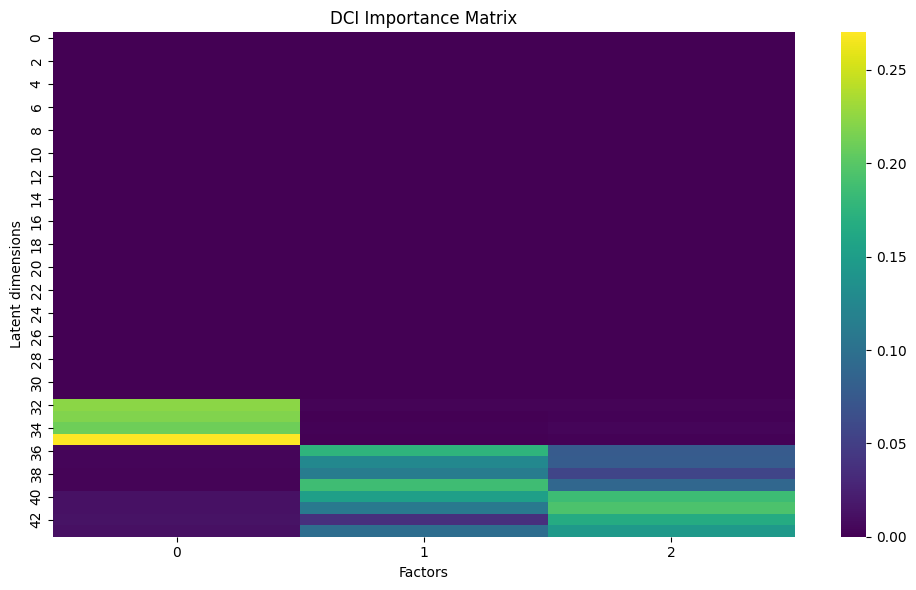

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(importance_matrix, cmap="viridis", annot=False)
plt.xlabel("Factors")
plt.ylabel("Latent dimensions")
plt.title("DCI Importance Matrix")
plt.tight_layout()
plt.show()

In [62]:
for j in range(importance_matrix.shape[1]):
    nonzero = np.sum(importance_matrix[:, j] > 0.01)
    print(f"Factor {j}: {nonzero} latent dims have >1% importance")


Factor 0: 16 latent dims have >1% importance
Factor 1: 4 latent dims have >1% importance
Factor 2: 16 latent dims have >1% importance
Factor 3: 16 latent dims have >1% importance
Factor 4: 16 latent dims have >1% importance
